# TP1 : Practical work on mathematical morphology

In [ ]:
#%% SECTION 1 -- inclusion of packages


import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io as skio


import skimage.morphology as morpho
from skimage.segmentation import watershed
from skimage.draw import line
import skimage.feature as skf
import skimage.filters as filters
import skimage.measure as measure
from scipy import ndimage as ndi


## 1 - Morphologie mathematique sur des images a niveaux de gris

In [ ]:
#%% SECTION 2 -- Useful functions

def viewimage(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI et MAXI seront mis a 0 et 255 dans l'image resultat

    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' '
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M

    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1

    nomfichier=tempfile.mktemp('TPIMA.png')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def viewimage_color(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI(defaut 0) et MAXI (defaut 255) seront mis a 0 et 255 dans l'image resultat

    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' '
    elif platform.system()=='Linux': #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    elif platform.system()=='Windows':
        prephrase='start /B "D:/GIMP/bin/gimp-2.10.exe" -a '#Remplacer D:/... par le chemin de votre GIMP
        endphrase= ''
    else:
        print('Systeme non pris en charge par l affichage GIMP')
        return 'erreur d afficahge'

    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1

    nomfichier=tempfile.mktemp('TPIMA.pgm')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def strel(forme,taille,angle=45):
    """renvoie un element structurant de forme
     'diamond'  boule de la norme 1 fermee de rayon taille
     'disk'     boule de la norme 2 fermee de rayon taille
     'square'   carre de cote taille (il vaut mieux utiliser taille=impair)
     'line'     segment de langueur taille et d'orientation angle (entre 0 et 180 en degres)
      (Cette fonction n'est pas standard dans python)
    """

    if forme == 'diamond':
        return morpho.diamond(taille)
    if forme == 'disk':
        return morpho.disk(taille)
    if forme == 'square':
        return morpho.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Erreur dans fonction strel: forme incomprise')



def couleurs_alea(im):
    """
    Donne des couleurs aleatoires a une image en niveau de gris.
    Cette fonction est utile lorsque le niveua de gris d'interprete comme un numero
      de region. Ou encore pour voir les leger degrades d'une teinte de gris.
      """
    sh=im.shape
    out=np.zeros((sh[0],sh[1],3),dtype=np.uint8)
    nbcoul=np.int32(im.max())
    tabcoul=np.random.randint(0,256,size=(nbcoul+1,3))
    tabcoul[0,:]=0
    for k in range(sh[0]):
        for l in range(sh[1]):
            out[k,l,:]=tabcoul[im[k,l]]
    return out

def gris_depuis_couleur(im):
    """ Transforme une image couleur en image a niveaux de gris"""
    return im[:,:,:3].sum(axis=2)/3


im_cellbin =  (512, 512)
im_cafe = (256, 256)
im_retina = (1, 256, 256)
im_bat200 = (200, 200, 3)
im_bulles= (253, 255, 3)
im_cailloux = (300, 384)
im_cailloux2 = (378, 527)
im_laiton = (256, 256, 3)


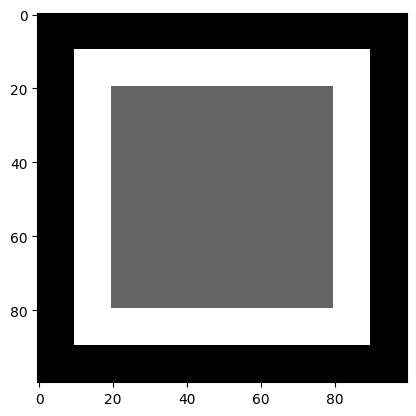

In [ ]:

#%% SECTION 3 -- Examples of functions for this work

# Binary images

im_cellbin=skio.imread('images/cellbin.bmp')
print("im_cellbin = ",im_cellbin.shape)

im_cafe=skio.imread('images/cafe.bmp')
print("im_cafe =", im_cafe.shape)

# Gray-scale images

im_retina=skio.imread('images/retina2.gif')
print("im_retina =", im_retina.shape)

im_bat200=skio.imread('images/bat200.bmp')
print("im_bat200 =", im_bat200.shape)


im_bulles=skio.imread('images/bulles.bmp')
print("im_bulles=", im_bulles.shape)

im_cailloux=gris_depuis_couleur(skio.imread('images/cailloux.png'))
print("im_cailloux =", im_cailloux.shape)

im_cailloux2=gris_depuis_couleur(skio.imread('images/cailloux2.png'))
print("im_cailloux2 =", im_cailloux2.shape)

im_laiton=skio.imread('images/laiton.bmp')
print("im_laiton =", im_laiton.shape)

im_square=np.zeros((100,100))
im_square[10:20,10:90]=254
im_square[80:90,10:90]=254
im_square[10:90,80:90]=254
im_square[10:90,10:20]=254
im_square[20:80,20:80]=100

plt.imshow(im_square, cmap = "gray")

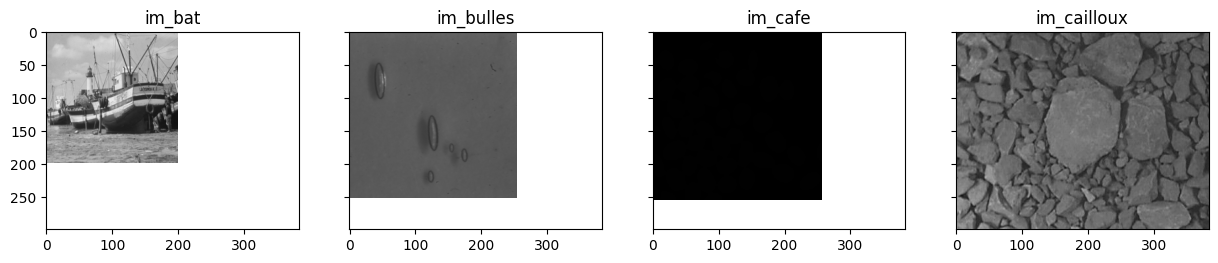

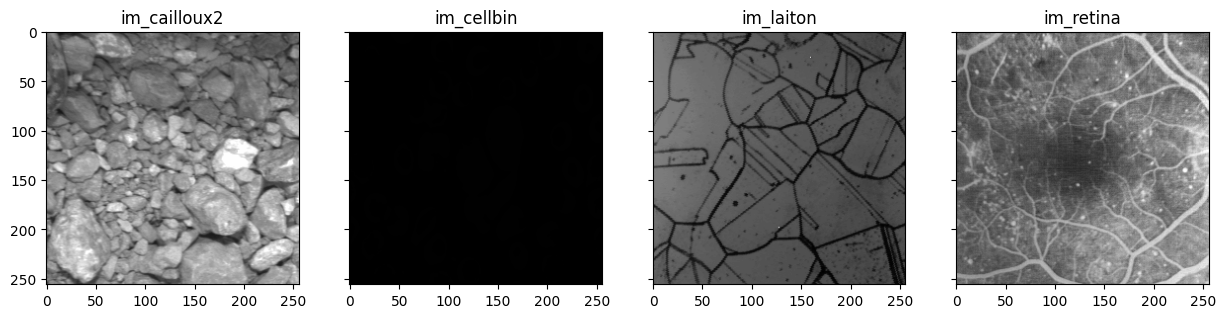

In [ ]:
# Visualisation des images

axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 4, sharex=True, sharey=True))
axs[0].imshow(im_bat200,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('im_bat')
axs[1].imshow(im_bulles,cmap="gray",vmin=0, vmax=255)
axs[1].set_title('im_bulles')
axs[2].imshow(im_cafe,cmap="gray",vmin=0, vmax=255)
axs[2].set_title('im_cafe')
axs[3].imshow(im_cailloux,cmap="gray",vmin=0, vmax=255)
axs[3].set_title('im_cailloux')
plt.show()

axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 4, sharex=True, sharey=True))
axs[0].imshow(im_cailloux2,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('im_cailloux2')
axs[1].imshow(im_cellbin,cmap="gray",vmin=0, vmax=255)
axs[1].set_title('im_cellbin')
axs[2].imshow(im_laiton,cmap="gray",vmin=0, vmax=255)
axs[2].set_title('im_laiton')
axs[3].imshow(im_retina[0],cmap="gray",vmin=0, vmax=255) # im_retina[0] selects the first and only channel
axs[3].set_title('im_retina')

plt.show()

### Q1 & Q2


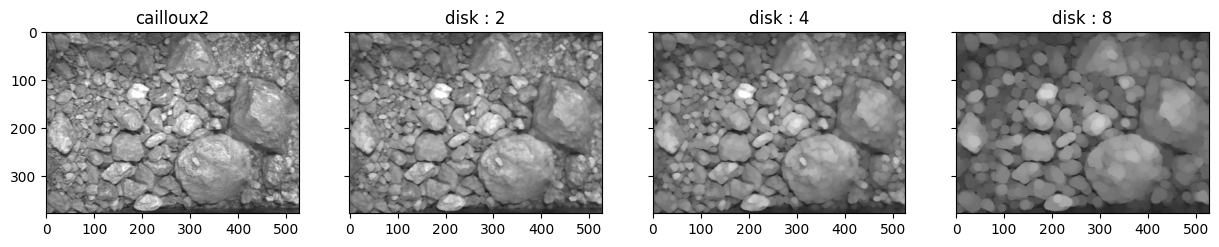

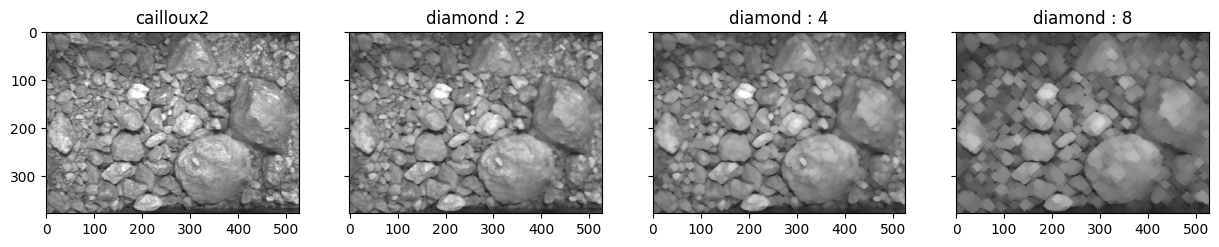

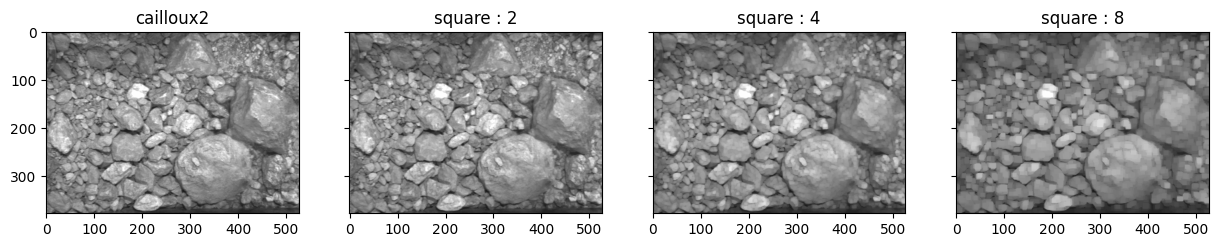

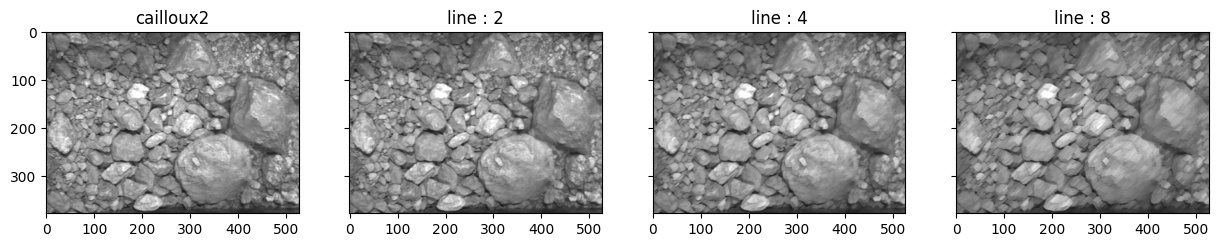

In [ ]:
# im = im_bat200
# im = im_bulles
#im = im_cafe
# im = im_cailloux
im = im_cailloux2
#im = im_cellbin
#im = im_laiton
#im = im_retina
#im = im_square
#im = im_citrons

# im = gris_depuis_couleur(im)

shapes_d=['diamond', 'square', 'disk', 'line']

# op = morpho.erosion
# op = morpho.dilation
# op = morpho.closing
op = morpho.opening


shape_d = "disk"
axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 4, sharex=True, sharey=True))
axs[0].imshow(im,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('cailloux2')
axs[1].imshow(op(im,strel(shape_d,2)),cmap="gray",vmin=0, vmax=255)
axs[1].set_title(shape_d+' : 2')
axs[2].imshow(op(im,strel(shape_d,4)),cmap="gray",vmin=0, vmax=255)
axs[2].set_title(shape_d+' : 4')
axs[3].imshow(op(im,strel(shape_d,8)),cmap="gray",vmin=0, vmax=255)
axs[3].set_title(shape_d+' : 8')
plt.savefig('images/open_d.png', bbox_inches='tight')

shape_d = "diamond"
axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 4, sharex=True, sharey=True))
axs[0].imshow(im,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('cailloux2')
axs[1].imshow(op(im,strel(shape_d,2)),cmap="gray",vmin=0, vmax=255)
axs[1].set_title(shape_d+' : 2')
axs[2].imshow(op(im,strel(shape_d,4)),cmap="gray",vmin=0, vmax=255)
axs[2].set_title(shape_d+' : 4')
axs[3].imshow(op(im,strel(shape_d,8)),cmap="gray",vmin=0, vmax=255)
axs[3].set_title(shape_d+' : 8')
# plt.savefig('images/dil_ddiam.png', bbox_inches='tight')

shape_d = "square"
axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 4, sharex=True, sharey=True))
axs[0].imshow(im,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('cailloux2')
axs[1].imshow(op(im,strel(shape_d,2)),cmap="gray",vmin=0, vmax=255)
axs[1].set_title(shape_d+' : 2')
axs[2].imshow(op(im,strel(shape_d,4)),cmap="gray",vmin=0, vmax=255)
axs[2].set_title(shape_d+' : 4')
axs[3].imshow(op(im,strel(shape_d,8)),cmap="gray",vmin=0, vmax=255)
axs[3].set_title(shape_d+' : 8')
# plt.savefig('images/dil_square.png', bbox_inches='tight')

shape_d = "line"
axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 4, sharex=True, sharey=True))
axs[0].imshow(im,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('cailloux2')
axs[1].imshow(op(im,strel(shape_d,2)),cmap="gray",vmin=0, vmax=255)
axs[1].set_title(shape_d+' : 2')
axs[2].imshow(op(im,strel(shape_d,4)),cmap="gray",vmin=0, vmax=255)
axs[2].set_title(shape_d+' : 4')
axs[3].imshow(op(im,strel(shape_d,8)),cmap="gray",vmin=0, vmax=255)
axs[3].set_title(shape_d+' : 8')
plt.savefig('images/open_l.png', bbox_inches='tight')

###Q3

Text(0.5, 1.0, 'Opening with 7*7')

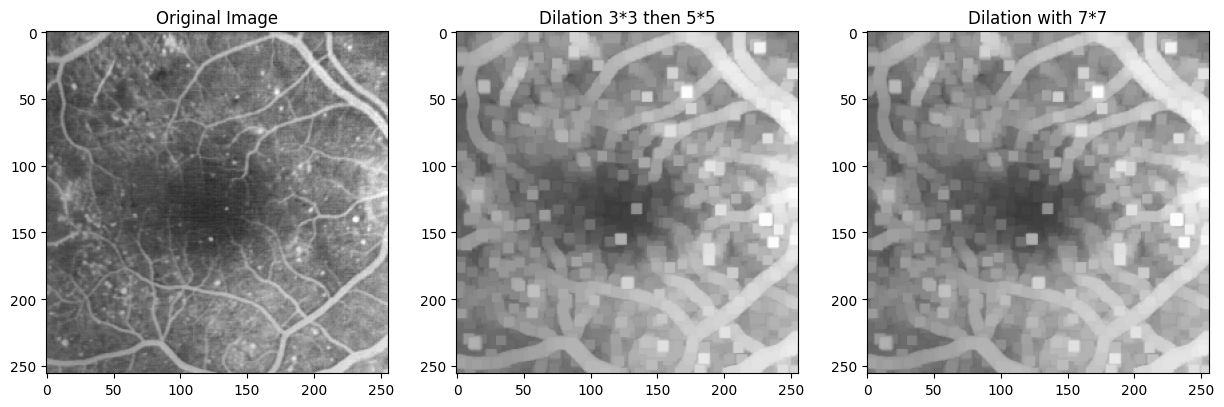

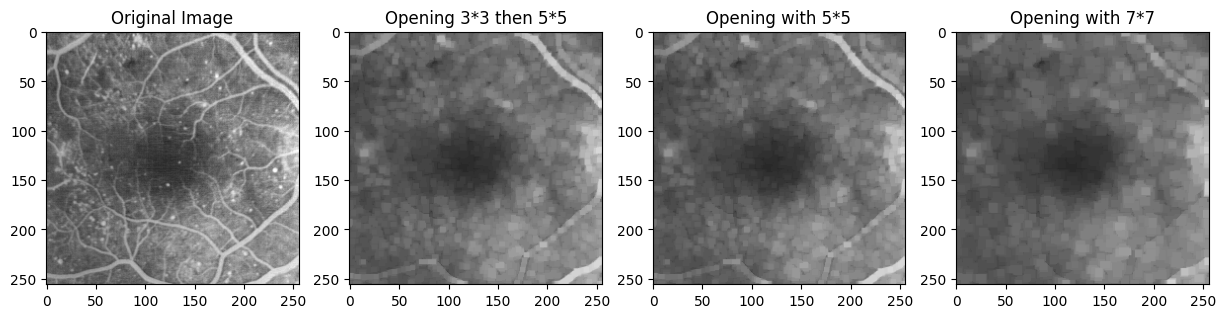

In [ ]:
im = im_retina[0]

# im = gris_depuis_couleur(im)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

# Structuring element
se1 = strel("square", 3)
se2 = strel("square", 5)
se3 = strel("square", 7)

# Successive dilations
dilation_1 = morpho.dilation(im, se1)
dilation_2 = morpho.dilation(dilation_1, se2)

# One dilation
dilation_3 = morpho.dilation(im, se3)

axs[0].imshow(im, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original Image")

axs[1].imshow(dilation_2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Dilation 3*3 then 5*5")

axs[2].imshow(dilation_3, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Dilation with 7*7")

fig, axs = plt.subplots(1, 4, figsize=(15, 15))

# Successive openings
opening_1 = morpho.opening(im, se1)
opening_2 = morpho.opening(opening_1, se2)

# One dilation
opening_3 = morpho.opening(im, se2)
opening_4 = morpho.opening(im, se3)

axs[0].imshow(im, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original Image")

axs[1].imshow(opening_2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Opening 3*3 then 5*5")

axs[2].imshow(opening_3, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Opening with 5*5")

axs[3].imshow(opening_4, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("Opening with 7*7")

### Question 4

#### Top-Hat Transform

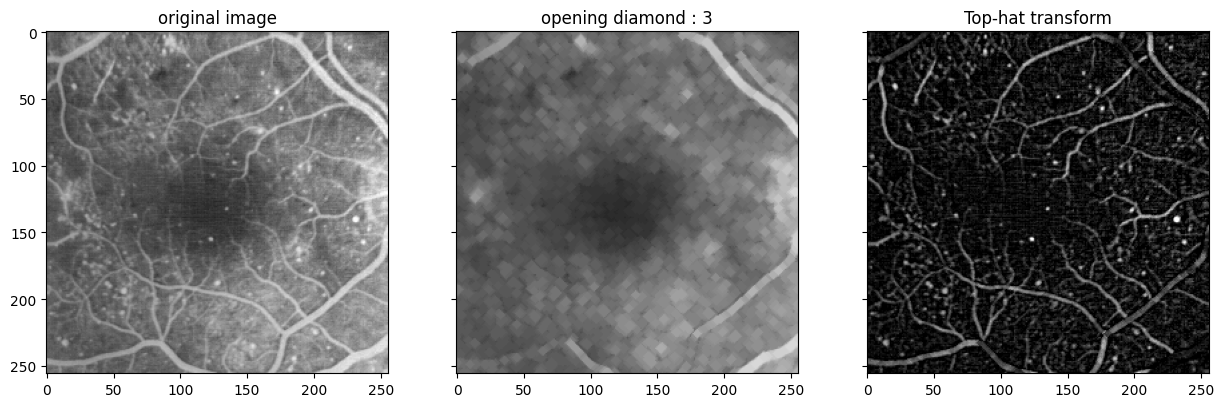

In [ ]:
im = im_retina[0]

op = morpho.opening

shape_d = "diamond"
axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 3, sharex=True, sharey=True))
axs[0].imshow(im,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('original image')
axs[1].imshow(op(im,strel(shape_d,3)),cmap="gray",vmin=0, vmax=255)
axs[1].set_title('opening '+shape_d+' : 3')
th = im -op(im,strel(shape_d,3))
axs[2].imshow(th,cmap="gray", vmin=0, vmax=110)
axs[2].set_title("Top-hat transform")

plt.show()

#### Bottom-Hat Transform

Text(0.5, 1.0, 'Bottom-hat transform')

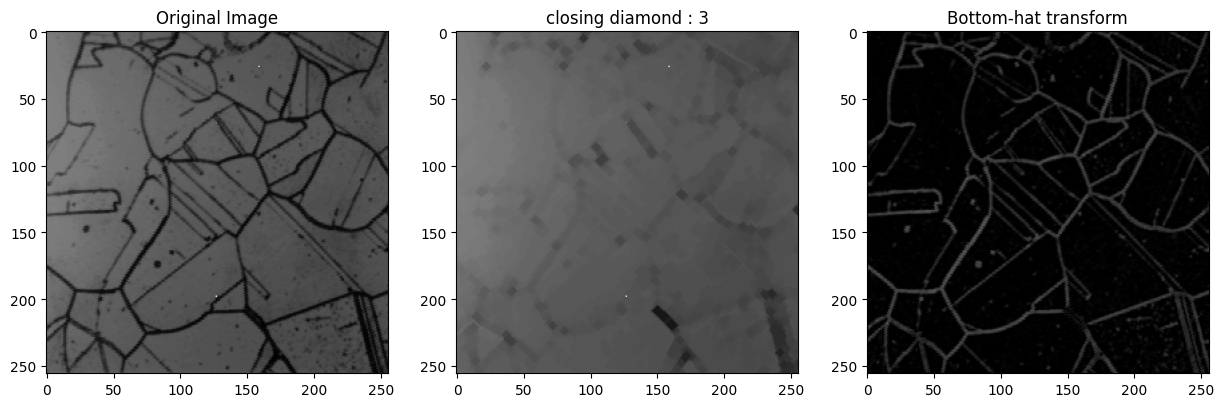

In [ ]:
im = im_laiton
im = gris_depuis_couleur(im)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

t = 10
se = strel("diamond", 3)
bh = morpho.closing(im, se) - im

axs[0].imshow(im, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original Image")

axs[1].imshow(morpho.closing(im, se), cmap="gray", vmin=0, vmax=255)
axs[1].set_title("closing diamond : 3")

axs[2].imshow(bh, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Bottom-hat transform")


### Question 5

Text(0.5, 1.0, 'Point-wise maximum')

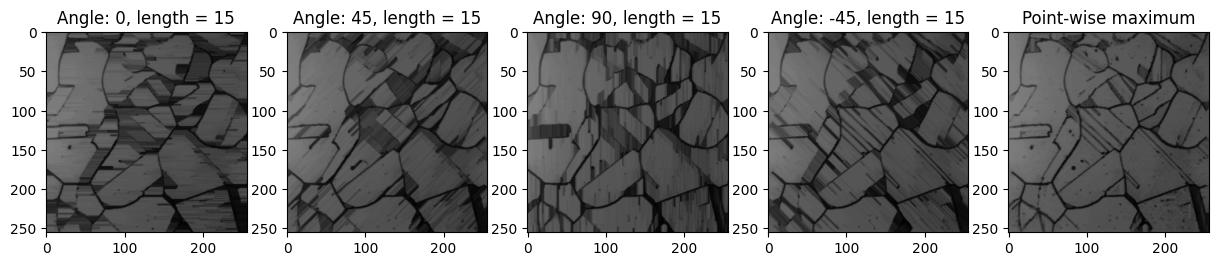

In [ ]:
im = im_laiton
im = gris_depuis_couleur(im)
op = morpho.opening

se1 = strel("line", 15, 0)
se2 = strel("line", 15, 45)
se3 = strel("line", 15, 90)
se4 = strel("line", 15, -45)

opening1 = op(im, se1)
opening2 = op(im, se2)
opening3 = op(im, se3)
opening4 = op(im, se4)

point_max = np.zeros(im.shape)

for row in range(im.shape[0]):
    for col in range(im.shape[1]):
        point_max[row, col] = max(
            opening1[row, col],
            opening2[row, col],
            opening3[row, col],
            opening4[row, col],
        )


fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].imshow(opening1, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Angle: 0, length = 15")
axs[1].imshow(opening2, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Angle: 45, length = 15")
axs[2].imshow(opening3, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Angle: 90, length = 15")
axs[3].imshow(opening4, cmap="gray", vmin=0, vmax=255)
axs[3].set_title("Angle: -45, length = 15")
axs[4].imshow(point_max, cmap="gray", vmin=0, vmax=255)
axs[4].set_title("Point-wise maximum")

## 2 - Alternate sequential filters

In [ ]:
def alt_sequential_f(im,se_shape, max_size):
    tmp_im=im.copy()
    l_im = []
    angle = 0
    for i in range(1, max_size+1):
        if se_shape == "line":
            tmp_im=morpho.opening(tmp_im,strel(se_shape, i, angle))
            tmp_im=morpho.closing(tmp_im,strel(se_shape, i, angle))
            angle+=30
        else:
            tmp_im=morpho.opening(tmp_im,strel(se_shape, i))
            tmp_im=morpho.closing(tmp_im,strel(se_shape, i))

    return tmp_im

In [ ]:
im= im_retina[0]
# im = gris_depuis_couleur(im)
shape_d = "disk"
max_sizes = [1,2,3,4,5]
axs = (plt.figure(figsize=(10,15),constrained_layout=False)
       .subplots(1, 6, sharex=True, sharey=True))
axs[0].imshow(im,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('original image')
i = 0
for max_size in max_sizes:
    i += 1
    im_seq = alt_sequential_f(im,shape_d,max_size)
    axs[i].imshow(im_seq,cmap="gray",vmin=0, vmax=255)
    axs[i].set_title('max_size : '+ str(max_size))


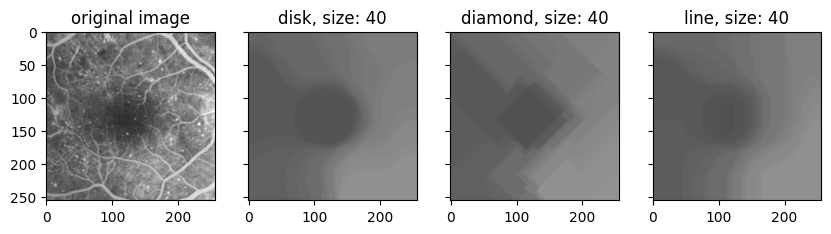

In [ ]:
im= im_retina[0]
#shape_d = "line"
max_size = 40
axs = (plt.figure(figsize=(10,15),constrained_layout=False)
       .subplots(1, 4, sharex=True, sharey=True))
axs[0].imshow(im,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('original image')
i = 0
for shape_d in ["disk", "diamond", "line"] :
    i += 1
    im_seq = alt_sequential_f(im,shape_d,max_size)
    axs[i].imshow(im_seq,cmap="gray",vmin=0, vmax=255)
    axs[i].set_title(shape_d+', size: '+ str(max_size))


## 3 - Reconstruction

(256, 256)


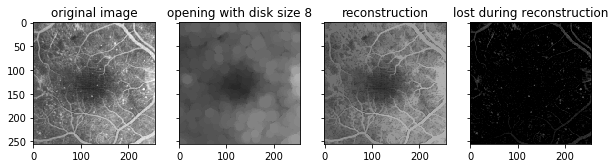

In [ ]:
#reconstruction by dilation from opening
im=im_retina
print(im.shape)
shape_d = "disk"
#shape_d = "line"
size = 8
se4 = strel(shape_d,size,60)
open4 = morpho.opening(im,se4)
reco=morpho.reconstruction(open4,im)

axs = (plt.figure(figsize=(10,15),constrained_layout=False)
       .subplots(1, 4, sharex=True, sharey=True))
axs[0].imshow(im,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('original image')
axs[1].imshow(open4,cmap="gray",vmin=0, vmax=255)
axs[1].set_title("opening with "+shape_d+" size "+str(size))
axs[2].imshow(reco,cmap="gray",vmin=0, vmax=255)
axs[2].set_title("reconstruction")
axs[3].imshow(im-reco,cmap="gray",vmin=0, vmax=255)
axs[3].set_title("lost during reconstruction")
#plt.savefig("images/reco_by_dil",bbox_inches='tight' )
plt.show()


Text(0.5, 1.0, 'Reconstruction')

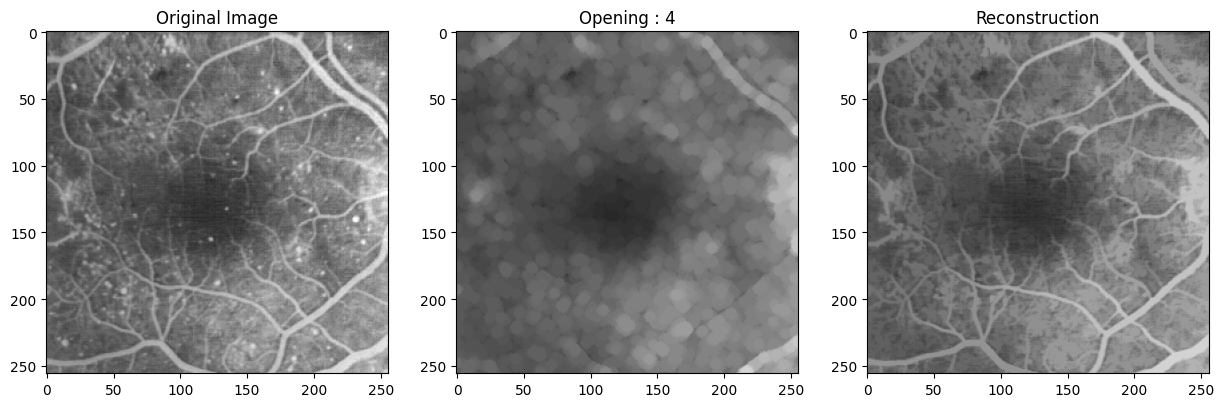

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

im = im_retina[0]
se4 = strel("disk", 4)
open4 = morpho.opening(im, se4)
reco = morpho.reconstruction(open4, im)

axs[0].imshow(im, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original Image")
axs[1].imshow(open4, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Opening : 4")
axs[2].imshow(reco, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Reconstruction")

Text(0.5, 1.0, 'Reconstruction')

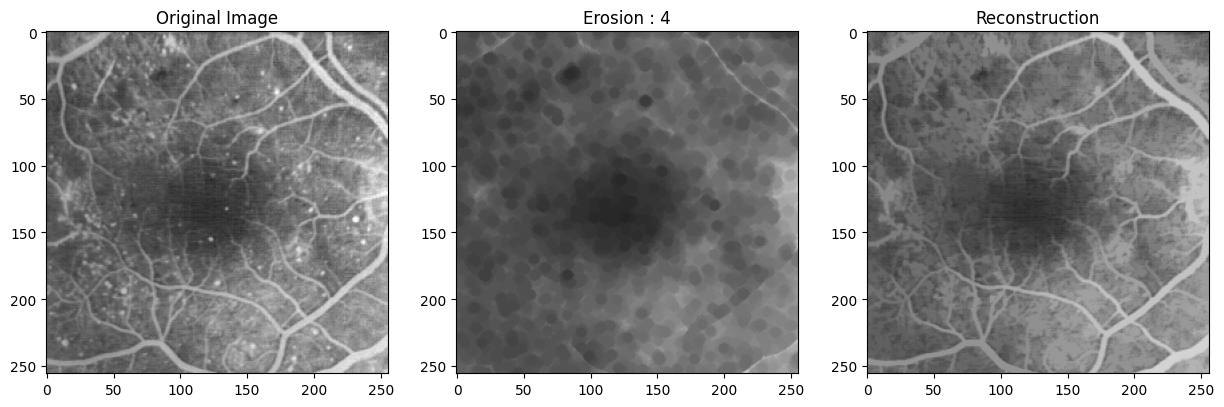

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

im = im_retina[0]
se4 = strel("disk", 4)
open4 = morpho.erosion(im, se4)
reco = morpho.reconstruction(open4, im)

axs[0].imshow(im, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original Image")
axs[1].imshow(open4, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Erosion : 4")
axs[2].imshow(reco, cmap="gray", vmin=0, vmax=255)
axs[2].set_title("Reconstruction")

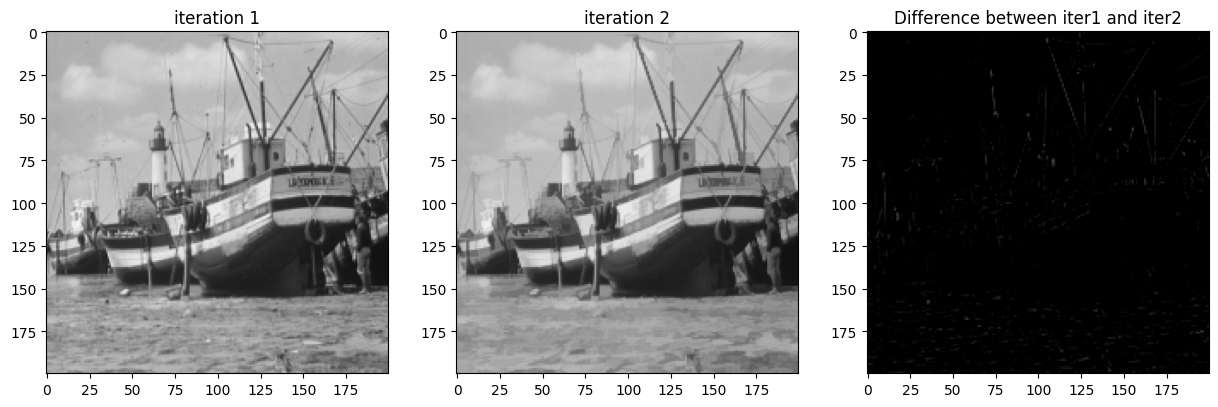

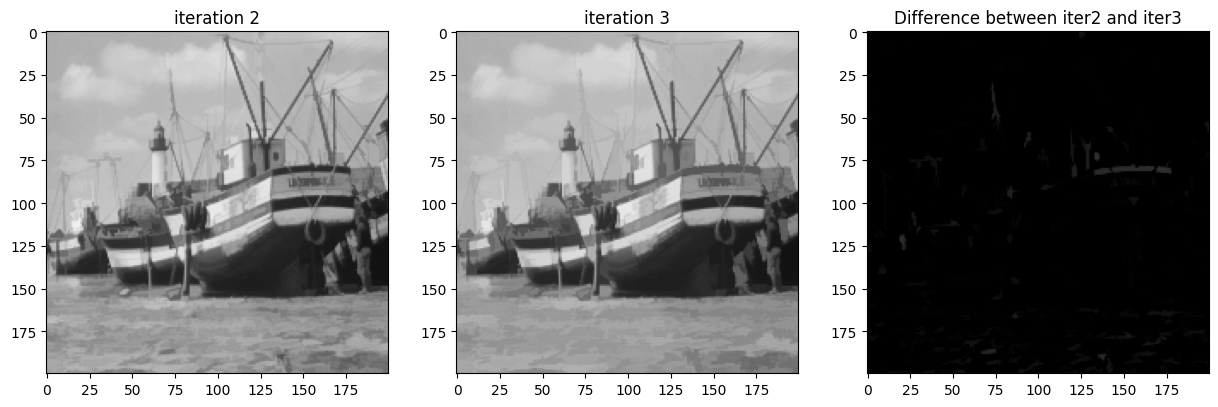

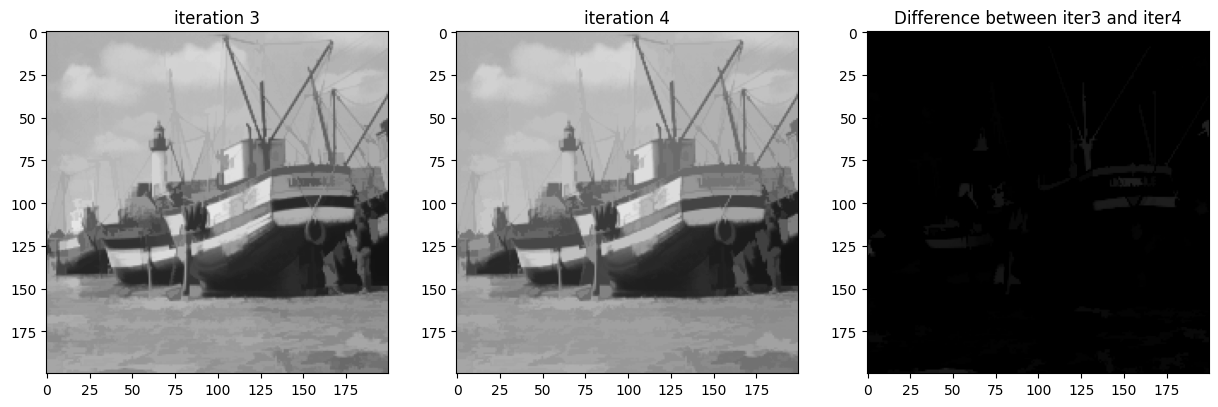

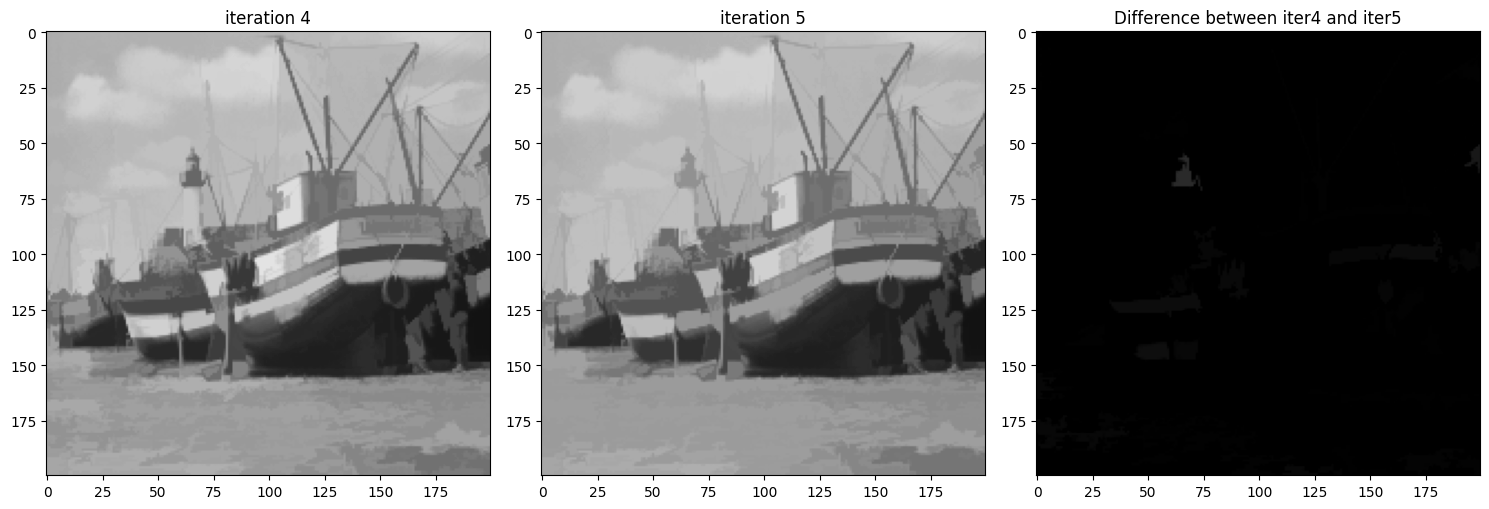

In [ ]:
im= im_bat200
im = gris_depuis_couleur(im)
imt = im.copy()
iter0 = im.copy()

for i in range(1,5):
    se = strel("disk", i)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    opened = morpho.opening(iter0, se)
    iter1 = morpho.reconstruction(opened, iter0)
    closed = morpho.closing(iter1, se)
    iter1 = morpho.reconstruction(closed, iter1, method='erosion')

    axes[0].imshow(iter0, cmap="gray", vmin=0, vmax=255)
    axes[0].set_title("iteration " + str(i))

    axes[1].imshow(iter1, cmap="gray", vmin=0, vmax=255)
    axes[1].set_title("iteration " + str(i+1))

    axes[2].imshow(iter1 - iter0, cmap="gray", vmin=0, vmax=255)
    axes[2].set_title("Difference between iter" + str(i) + " and iter" + str(i + 1))

    iter0 = iter1

plt.tight_layout()
plt.show()

## 4 - Segmentation

### Question 1

Text(0.5, 1.0, 'Morphological Gradient')

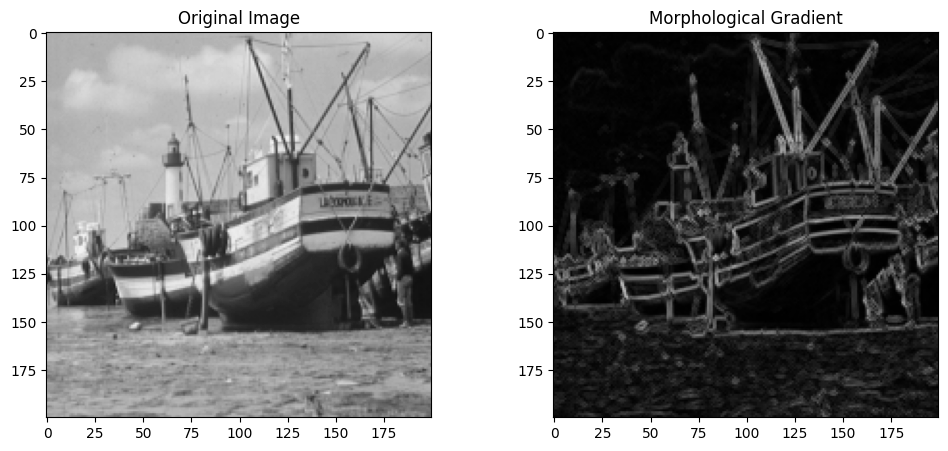

In [ ]:
im = gris_depuis_couleur(im_bat200)
se = strel("disk", 1)
dil1 = morpho.dilation(im, se)
er1 = morpho.erosion(im, se)
morpho_grad = dil1 - er1
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(im, cmap="gray", vmin=0, vmax=255)
axs[0].set_title("Original Image")
axs[1].imshow(dil1 - er1, cmap="gray", vmin=0, vmax=255)
axs[1].set_title("Morphological Gradient")

### Question 2

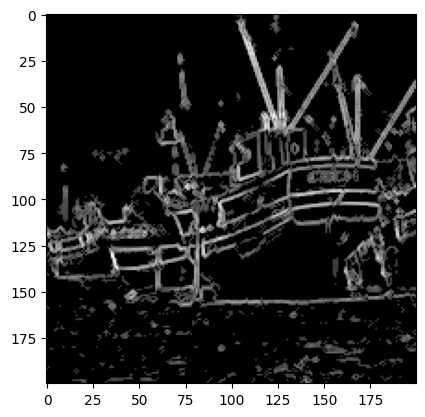

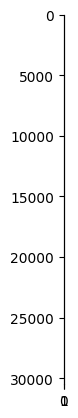

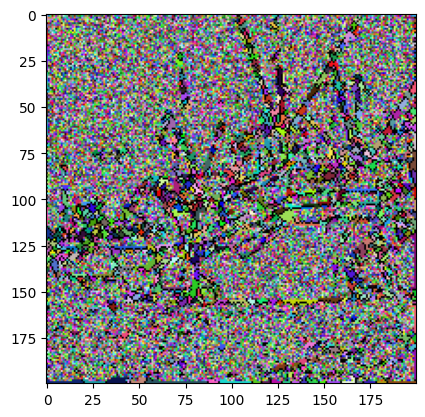

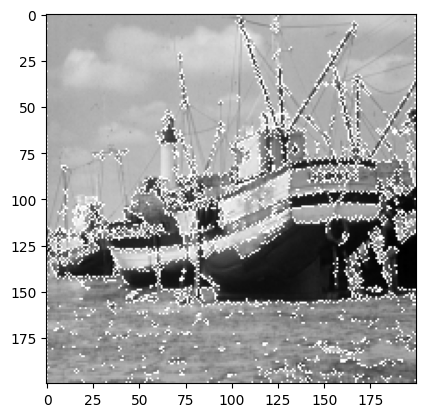

In [ ]:
se = morpho.disk(1)

grad = morpho.dilation(im, se) -morpho.erosion(im, se)
grad = np.int32(grad > 40) * grad
plt.imshow(grad, cmap="gray")
plt.show()

local_mini = skf.peak_local_max(255 - grad)
markers = np.zeros_like(grad, dtype=int)
for i, (row, col) in enumerate(local_mini, start=1):
    markers[row, col] = i

plt.imshow(local_mini, cmap="gray")
plt.show()

labels = watershed(grad, markers, watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.show()

# visualization of the result
segm = labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i, j] == 0:
            segm[i, j] = 255
        else:
            segm[i, j] = 0

# superimposition of segmentation contours on the original image
contourSup = np.maximum(segm, im)
plt.imshow(contourSup, cmap="gray")

### Question 3

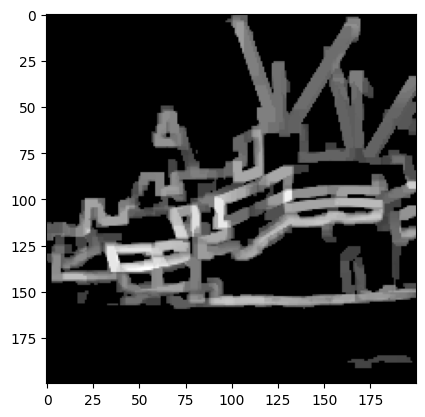

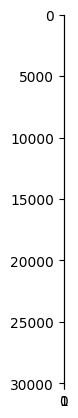

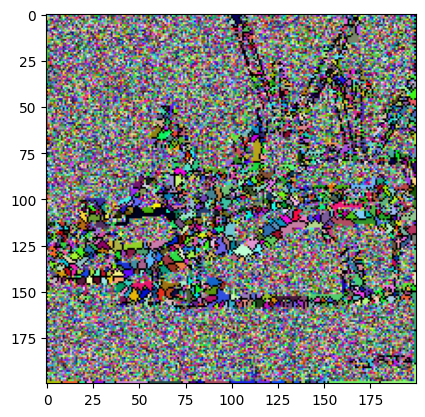

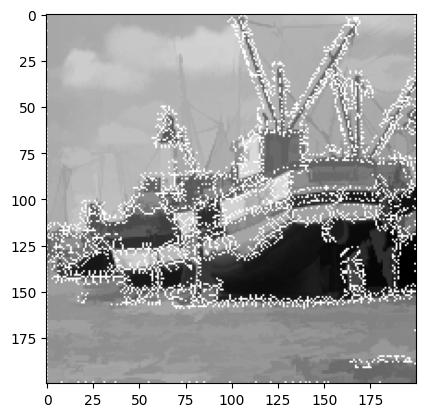

In [ ]:
im = gris_depuis_couleur(im_bat200)
se = morpho.disk(1)
r = 1

for r, _ in enumerate(range(0, 6), start=1):
    se = strel("square", r)
    opening = morpho.opening(im, se)
    recon1 = morpho.reconstruction(opening, im)
    closing = morpho.closing(recon1, se)
    recon2 = morpho.reconstruction(closing, recon1, 'erosion')
    fas = recon2
    im = fas

grad = morpho.dilation(im, se) - morpho.erosion(im, se)
grad = np.int32(grad > 40) * grad
plt.imshow(grad, cmap="gray")
plt.show()

local_mini =skf.peak_local_max(255 - grad)
markers = np.zeros_like(grad, dtype=int)
for i, (row, col) in enumerate(local_mini, start=1):
    markers[row, col] = i
plt.imshow(local_mini, cmap="gray")
plt.show()

labels = watershed(grad, markers, watershed_line=True)
plt.imshow(couleurs_alea(labels))
plt.show()

# visualization of the result
segm = labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i, j] == 0:
            segm[i, j] = 255
        else:
            segm[i, j] = 0

# superimposition of segmentation contours on the original image
contourSup = np.maximum(segm, im)
plt.imshow(contourSup, cmap="gray")

### Question 4

<Figure size 1000x500 with 0 Axes>

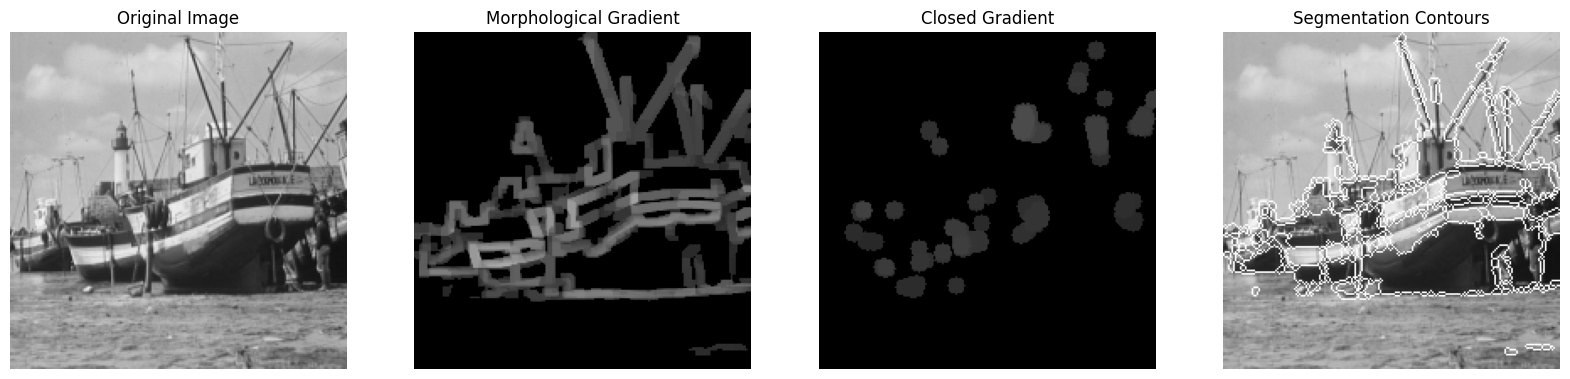

In [ ]:
for i in [1,2,5]:
    seuil = i
    opening = morpho.opening(grad, strel('disk', i))
    top_hat = grad - opening

    local_mini = skf.peak_local_max(255 - top_hat)
    mask = np.zeros(im.shape, dtype=bool)
    mask[tuple(local_mini.T)] = True
    markers, _ = ndi.label(mask)

    labels = watershed(top_hat, markers, mask=im, watershed_line=True)

# visualization of the result
segm=labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i,j] == 0:
            segm[i,j]=255
        else:
            segm[i,j]=0
contourSup=np.maximum(segm,im)


plt.figure(figsize=(10, 5))
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(im, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(grad, cmap="gray", vmin=0, vmax=255)
axes[1].set_title("Morphological Gradient")
axes[1].axis('off')

axes[2].imshow(opening, cmap="gray", vmin=0, vmax=255)
axes[2].set_title("Closed Gradient")
axes[2].axis('off')

axes[3].imshow(contourSup, cmap="gray", vmin=0, vmax=255)
axes[3].set_title("Segmentation Contours")
axes[3].axis('off')

plt.show()

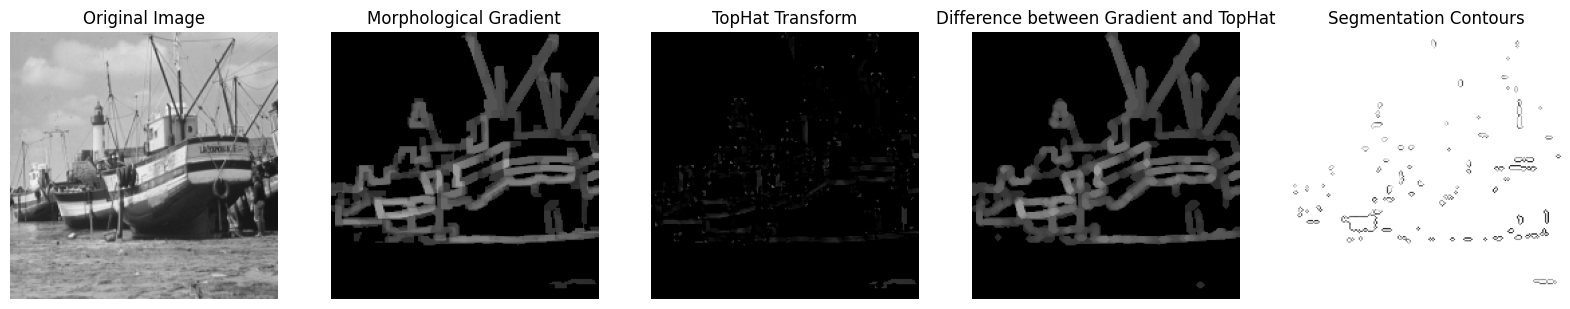

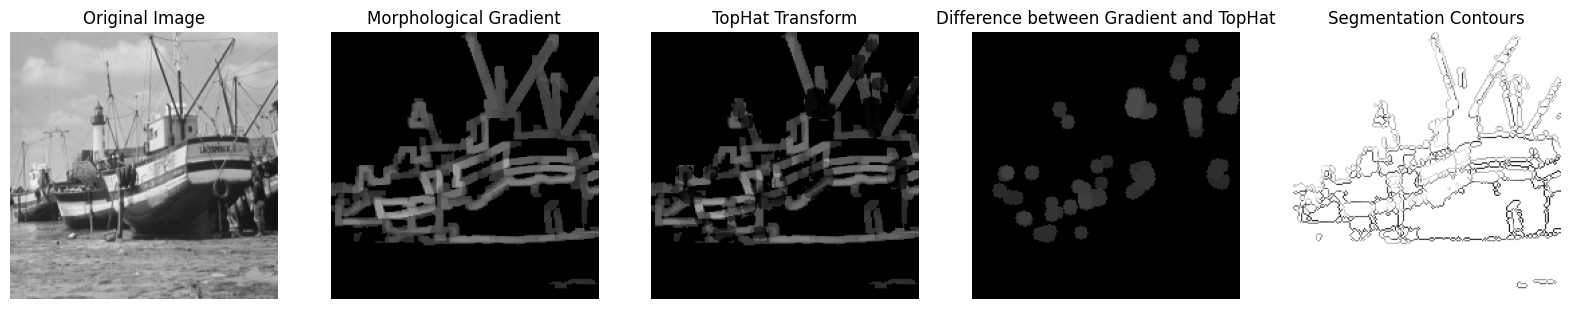

In [ ]:
# Display with TOP HAT transform

for i in [2,5]:
    seuil = i
    opening = morpho.opening(grad, strel('disk', i))
    top_hat = grad - opening

    local_mini = skf.peak_local_max(255 - top_hat)
    mask = np.zeros(im.shape, dtype=bool)
    mask[tuple(local_mini.T)] = True
    markers, _ = ndi.label(mask)

    labels = watershed(top_hat, markers, mask=im, watershed_line=True)

    segm = labels.copy()
    segm[segm != 0] = 255
    segm[segm == 0] = 0

    contourSup = np.maximum(segm, im)

    # Display
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    axes[0].imshow(im, cmap="gray", vmin=0, vmax=255)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(grad, cmap="gray", vmin=0, vmax=255)
    axes[1].set_title("Morphological Gradient")
    axes[1].axis('off')
    axes[2].imshow(top_hat, cmap="gray", vmin=0, vmax=255)
    axes[2].set_title("TopHat Transform")
    axes[2].axis('off')
    axes[3].imshow(grad - top_hat, cmap="gray", vmin=0, vmax=255)
    axes[3].set_title("Difference between Gradient and TopHat")
    axes[3].axis('off')
    axes[4].imshow(contourSup, cmap="gray", vmin=0, vmax=255)
    axes[4].set_title("Segmentation Contours")
    axes[4].axis('off')
    plt.show()

### Question 5

Text(0.5, 1.0, 'Résultat Superposé avec marqueurs')

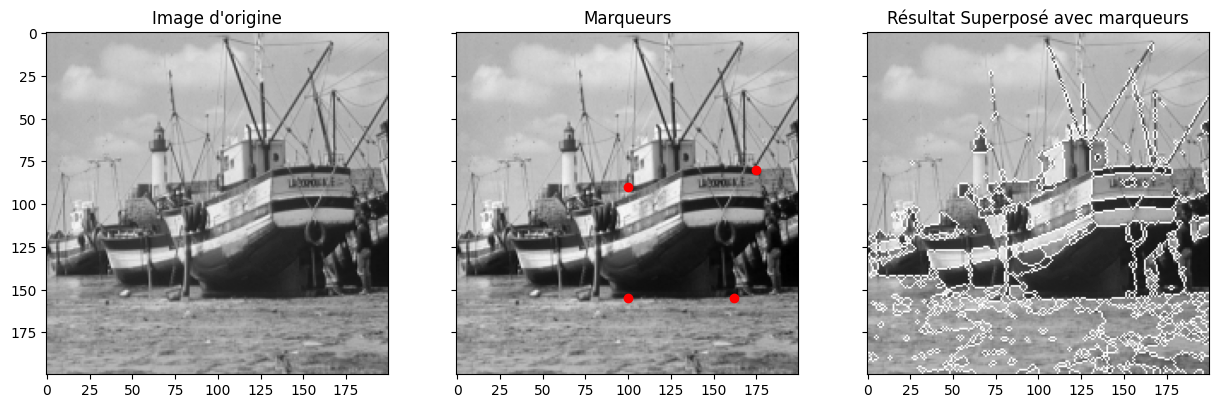

In [ ]:
markers = np.ones_like(im)
markers = markers * 255
markers[90,100] = 0
markers[155, 100] = 0
markers[80, 175] = 0
markers[155, 162] = 0

I_p = np.minimum(grad, markers)

imreconstructed = morpho.reconstruction(markers, I_p, method='erosion')

local_mini = skf.peak_local_max(255 - imreconstructed)
mask = np.zeros(im.shape, dtype=bool)
mask[tuple(local_mini.T)] = True
markers2, _ = ndi.label(mask)

labels = watershed(imreconstructed, markers2, mask=im, watershed_line=True)

segm = labels.copy()
for i in range(segm.shape[0]):
    for j in range(segm.shape[1]):
        if segm[i, j] == 0:
            segm[i, j] = 255
        else:
            segm[i, j] = 0
contourSup = np.maximum(segm, im)

axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1,3 , sharex=True, sharey=True))
axs[0].imshow(im,cmap="gray",vmin=0, vmax=255)
axs[0].set_title('Image d\'origine')

axs[1].imshow(im,cmap="gray")
axs[1].scatter(100,90, c='r')
axs[1].scatter(100,155, c='r')
axs[1].scatter(175,80, c='r')
axs[1].scatter(162,155, c='r')
axs[1].set_title('Marqueurs')

axs[2].imshow(contourSup,cmap="gray",vmin=0, vmax=255)
axs[2].set_title("Résultat Superposé avec marqueurs")



###Question 6

Text(0.5, 1.0, 'Marqueurs récupérés')

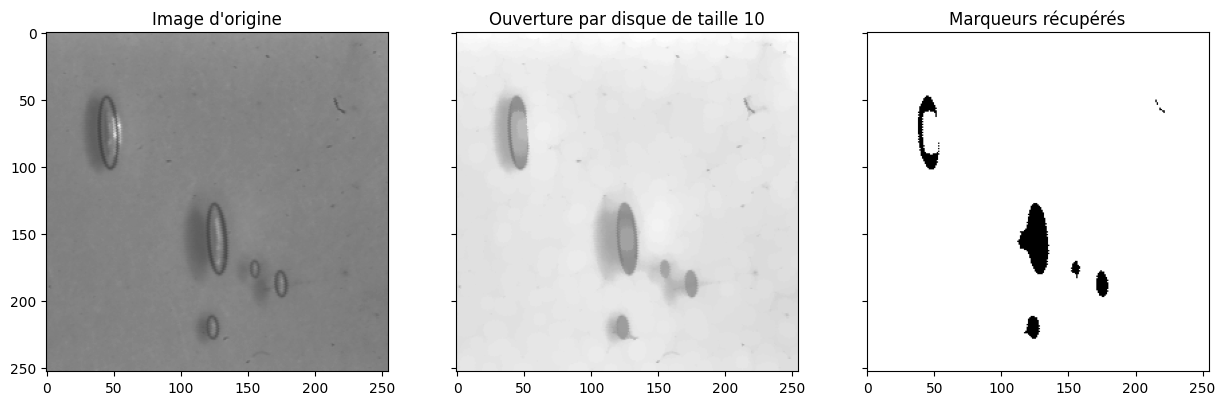

In [ ]:
im = gris_depuis_couleur(im_bulles)

op = morpho.opening(im, strel('disk', 5))

markers = op.copy()
s = 65
markers[markers < s] = 0
markers[markers >= s] = 255

axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1,3 , sharex=True, sharey=True))
axs[0].imshow(im, cmap="gray")
axs[0].set_title('Image d\'origine')

axs[1].imshow(op,cmap="gray")
axs[1].set_title('Ouverture par disque de taille 10')

axs[2].imshow(markers,cmap="gray",vmin=0, vmax=255)
axs[2].set_title("Marqueurs récupérés")

Text(0.5, 1.0, 'Contours récupérés')

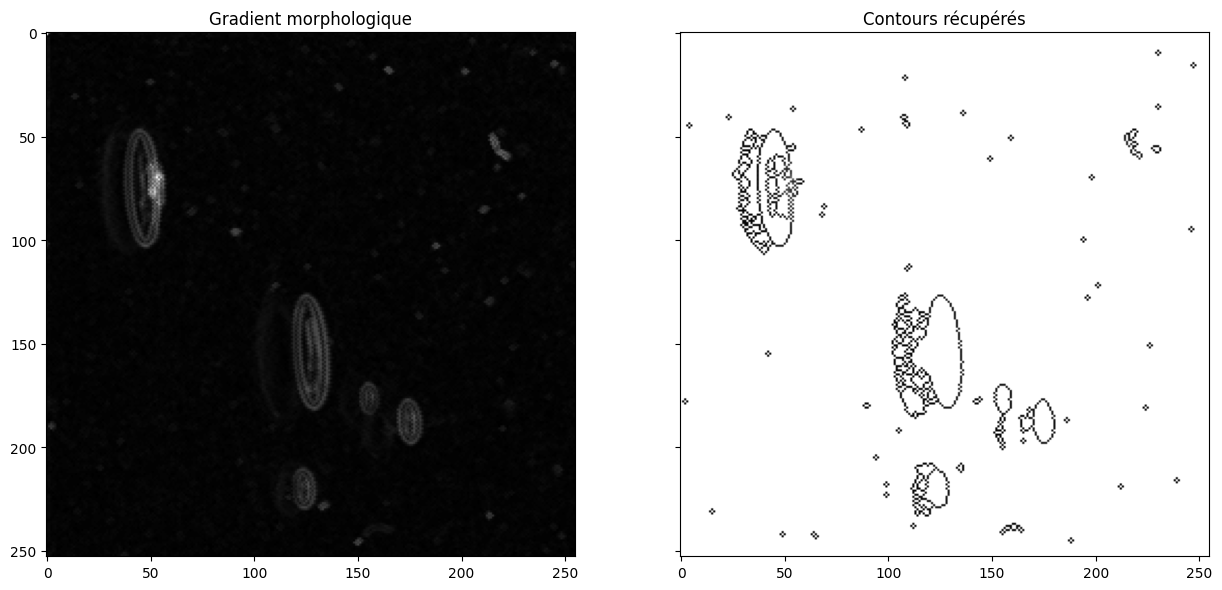

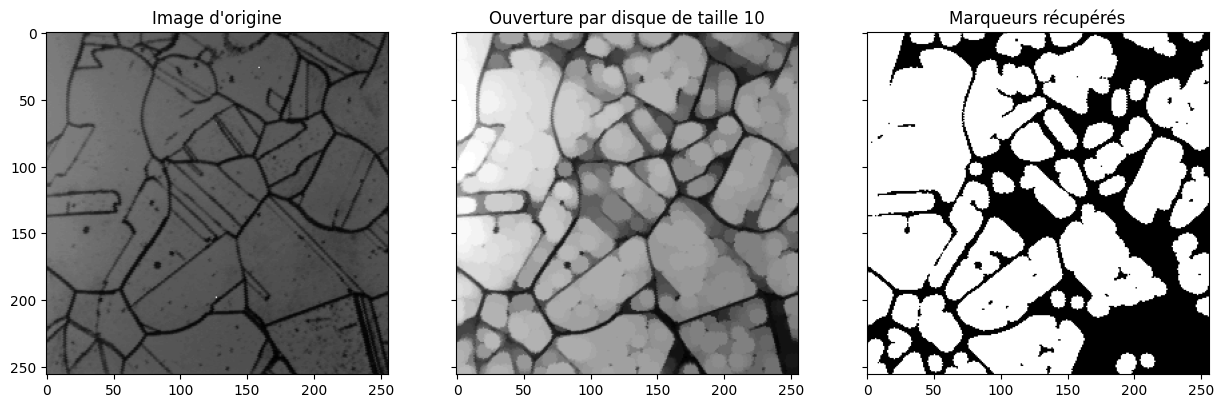

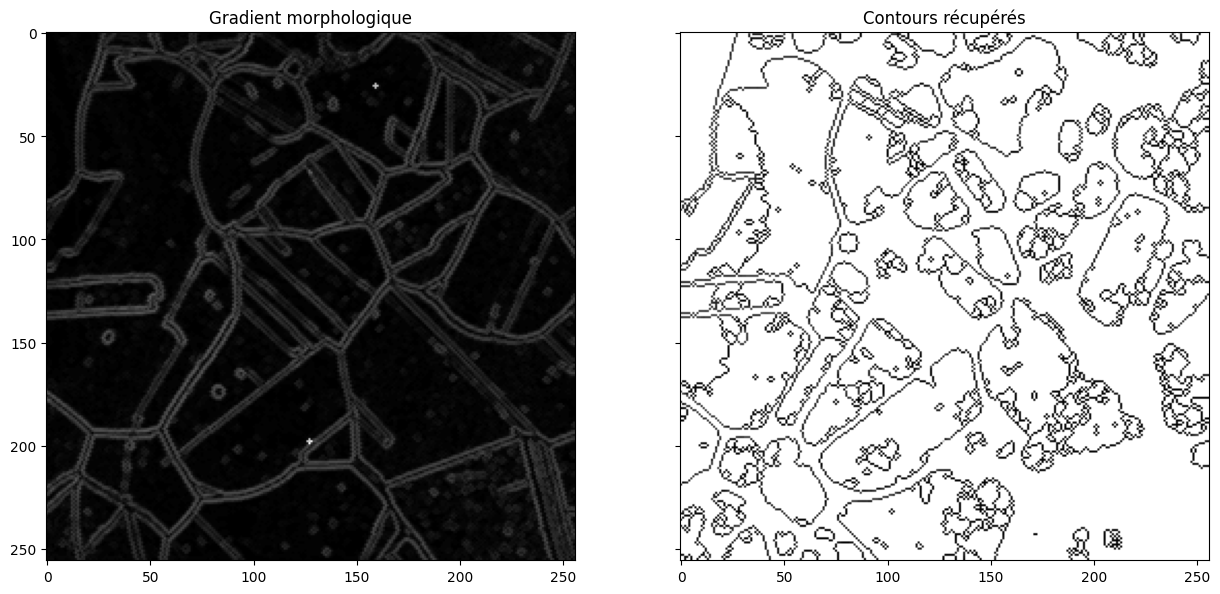

In [ ]:
grad = morpho.dilation(im, se) - morpho.erosion(im, se)

I_p = np.minimum(grad, markers)

rec = morpho.reconstruction(markers, I_p, method='erosion')

local_mini = skf.peak_local_max(255 - rec)
mask = np.zeros(im.shape, dtype=bool)
mask[tuple(local_mini.T)] = True
markers, _ = ndi.label(mask)

labels = watershed(rec, markers, mask=im, watershed_line=True)

segm = labels.copy()
segm[segm != 0] = 255
segm[segm == 0] = 0

contourSup = np.maximum(segm, rec)

axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1,2 , sharex=True, sharey=True))
axs[0].imshow(grad, cmap="gray")
axs[0].set_title('Gradient morphologique')

axs[1].imshow(contourSup,cmap="gray",vmin=0, vmax=255)
axs[1].set_title("Contours récupérés")

im = gris_depuis_couleur(im_laiton)

op = morpho.opening(im, strel('disk', 5))

markers = op.copy()
s = 65
markers[markers < s] = 0
markers[markers >= s] = 255

axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1,3 , sharex=True, sharey=True))
axs[0].imshow(im, cmap="gray")
axs[0].set_title('Image d\'origine')

axs[1].imshow(op,cmap="gray")
axs[1].set_title('Ouverture par disque de taille 10')

axs[2].imshow(markers,cmap="gray",vmin=0, vmax=255)
axs[2].set_title("Marqueurs récupérés")

grad = morpho.dilation(im, se) - morpho.erosion(im, se)

I_p = np.minimum(grad, markers)

rec = morpho.reconstruction(markers, I_p, method='erosion')

local_mini = skf.peak_local_max(255 - rec)
mask = np.zeros(im.shape, dtype=bool)
mask[tuple(local_mini.T)] = True
markers, _ = ndi.label(mask)

labels = watershed(rec, markers, mask=im, watershed_line=True)

segm = labels.copy()
segm[segm != 0] = 255
segm[segm == 0] = 0

contourSup = np.maximum(segm, rec)

axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1,2 , sharex=True, sharey=True))
axs[0].imshow(grad, cmap="gray")
axs[0].set_title('Gradient morphologique')

axs[1].imshow(contourSup,cmap="gray",vmin=0, vmax=255)
axs[1].set_title("Contours récupérés")